<a href="https://colab.research.google.com/github/BetoACE/Python.-De-cero-a-ML/blob/main/Regresi%C3%B3n_Lineal_Simple_ML_UNAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como funciona la Regresión Lineal

La idea detrás de la regresión lineal es encontrar una línea recta que mejor se ajuste a los datos.
Esto se hace utilizando la ecuación de la recta, y = mx + b,
donde m es el coeficiente de la variable independiente (o también conocida como la "pendiente", x es el valor de la variable independiente y b es el término de intercepción.

La regresión lineal es útil cuando se cree que existe una relación lineal entre las variables. Sin embargo, tenga en cuenta que la regresión lineal no es adecuada para modelar relaciones no lineales


#Descripción de la tarea:
Una empresa ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017.

Toca realizar las siguientes tareas:

Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.
¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?
Evaluar el modelo a través de la SCE y el coeficiente de determinación (R2)

In [ ]:
#Carga y análisis de la Data

url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'


Importar librerías necesarias

In [ ]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats.stats import pearsonr



<ipython-input-8-3ff608e9154e>:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [ ]:
#Cargar datos

df = pd.read_csv(url, sep=';', decimal=',')

In [ ]:
#Explorar datos

df.describe()
df.head(15)
df.tail(15)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [ ]:
#EDA exploración o Analisis global de datos estadisticos

In [ ]:
df.describe(include='float64')

print("La media de la varaible Inversión es: ", df["Inversion"].median())
print("La media de la varaible Ventas es: ", df["Ventas"].median())

df.isnull().sum()

La media de la varaible Inversión es:  10.25
La media de la varaible Ventas es:  11.079999999999998


,0
Fecha_anual,0
Inversion,0
Ventas,0


#¡Grafiquémos!

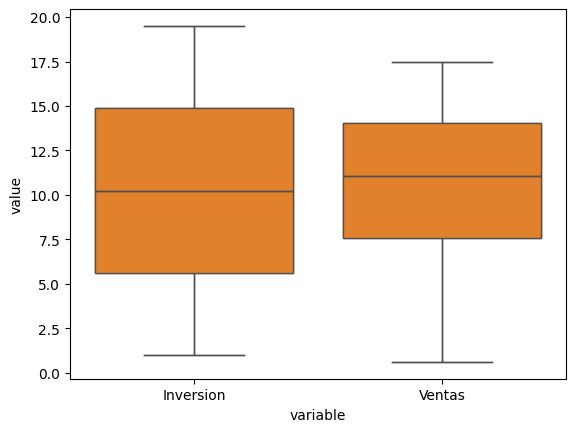

In [ ]:
# df.plot(
#     x    = 'Inversion',
#     y    = 'Ventas')

# sns.scatterplot(x = "Ventas", y = "Inversion", data = df)

# df.plot(
#     x    = 'Inversion',
#     y    = 'Ventas',
#     c    = 'firebrick',
#     kind = "scatter",

# )

# plt.scatter(df['Ventas'], df['Inversion'])
# plt.xlabel('Ventas')
# plt.ylabel('Inversión')
# plt.show()


sns.boxplot(data=df.drop(columns=["Fecha_anual"]))

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["Inversion", "Ventas"])

#Conceptos elementales de la Regresión Lineal

Los principales elementos que hay que interpretar en un modelo de regresión lineal son los coeficientes de los predictores. Recordemos que la ecuación de un modelo de regresión lineal es:

y
=
β
0
+
β
j
x
+
e

donde:

y = variable dependiente o endógena

x = variable independiente o explicativa

𝛽0, 𝛽𝑗 = parámetros fijos y desconocidos

e = termino de error que recoge todos los demás factores que afectan a Y, pero que no están incluidos en el modelo. También puede captar los errores de estimación de la variable dependiente. No observable.

In [ ]:
#Análisis entre variables Inversión y Ventas

covarianza = df.cov()["Inversion"]["Ventas"]

print("la covarianza entre las variables es de:", covarianza)

la covarianza entre las variables es de: 22.92993243243243


Con la covarianza, vemos que la relación es positiva, es decir, presenta una relación directa. Esto implica que a medida que aumentan la inversión, hay una tendencia a que se incrementen las ventas

In [ ]:
# Correlación lineal entre Inversión y Ventas. Estadístico de correlacion de Pearson

corr_test = pearsonr(x = df['Inversion'], y =  df['Ventas'])

print("la correlación entre las variables es de:", round(corr_test[0],2))

la correlación entre las variables es de: 0.96


#Código para regresión

In [ ]:
from scipy import stats as ss

#pendiente, coeficiente, pearson, p, error

slope, intercept, r, p, se = ss.linregress(df["Inversion"],df["Ventas"])

print(f"Pendiente: {slope}\nCoeficiente: {intercept}\nCoeficiente Pearson: {r}\nP-Values: {p}\nError: {se}")


Pendiente: 0.7426698763540868
Coeficiente: 2.8805285042127142
Coeficiente Pearson: 0.9562823420491505
P-Values: 8.25497955552195e-21
Error: 0.0378532029452961


In [ ]:
# generar la prediccion

def Prediccion_ventas(x):
    return intercept + slope*x

recta = np.vectorize(Prediccion_ventas)
linea = Prediccion_ventas(np.arange(3000))

valor_predecir = 7
prediccion = intercept + slope * valor_predecir

<ipython-input-53-51eb223c9f8a>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(linea , 'r--', color='red', label="Ajustado")


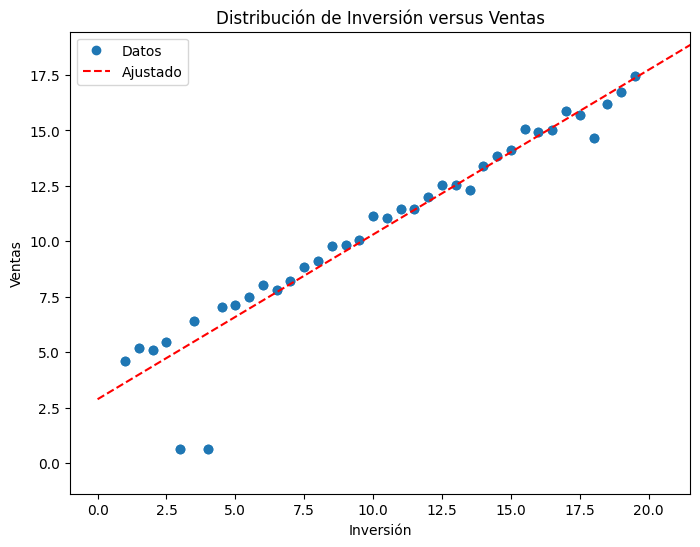

In [ ]:

# labels
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Distribución de Inversión versus Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(df["Inversion"].min() - 2 , df["Inversion"].max() + 2 )
plt.ylim(df["Ventas"].min() - 2 , df["Ventas"].max() + 2 )

# Nube de puntos + recta de regresión
plt.scatter(df["Inversion"],df["Ventas"])
colores= ['blue', 'red']
ax.plot(df["Inversion"], df["Ventas"], 'o' , label='Datos' )
ax.plot(linea , 'r--', color='red', label="Ajustado")
legend = ax.legend(loc="best")

#¿Cómo hago el análisis?

𝛽0 Este parametro no afecta en nada la relación entre Ventas e Inversión. Por lo que sólo se trata de una normalización en la que se supone que el valor promedio del error será cero.  En este caso es de 2.8805.

𝛽𝑗 Este valor debería reflejar cuál es el impacto de un cambio de Inversión sobre la variable Ventas, cuando el resto de las variables explicativas se mantienen constantes. Para este caso, el valor es de 0.74267.

Ahora utilizando la función generada Prediccion_ventas(), haremos una predicción de ventas si la inversión es de 7 millones de euros:

#hacer la predición

In [ ]:
valor_predecir = 1
prediccion = intercept + slope * valor_predecir
print(f"La prediccion de Ventas para {valor_predecir} millones de euros en inversión es de: ", prediccion)

La prediccion de Ventas para 1 millones de euros en inversión es de:  3.623198380566801
